In [6]:
source("../src/utils/punto1.R")
source("../src/utils/punto2.R")
source("../src/utils/punto4.R")

In [7]:
tabla_muestra = read.csv("../data/in/muestra.csv")

In [8]:
# Definir parámetros para la prueba
x <- 25  # Edad
r <- 0.05  # Incremento anual del valor asegurado
i <- 0.085  # Tasa de interés
m <- 12  # Pagos mensuales

# Probar la función con la tabla de muestra
print(IrAmx(tabla_muestra, x, r, i, m))
print(ImrAmx(tabla_muestra, x, r, i, m))
print(GrAmx(tabla_muestra, x, r, i, m))

[1] 0.07879583
[1] 0.07958833
[1] 0.1935215


In [9]:
source("../src/data/read.R")

tabla_mortalidad <- leer_excel("data/in/Tablas Mortalidad.xls", hoja = 1)

r <- 0.05
i <- 0.1
m <- 12

resultados <- data.frame(
  x = tabla_mortalidad$x,
  qx = sapply(tabla_mortalidad$x, function(edad) {
    tryCatch(round(tabla_mortalidad$qx[tabla_mortalidad$x == edad], 6), error = function(e) NA)
  }),
  IrAmx = sapply(tabla_mortalidad$x, function(edad) {
    tryCatch(round(IrAmx(tabla_mortalidad, edad, r, i, m), 6), error = function(e) NA)
  }),
  ImrAmx = sapply(tabla_mortalidad$x, function(edad) {
    tryCatch(round(ImrAmx(tabla_mortalidad, edad, r, i, m), 6), error = function(e) NA)
  }),
  GrAmx = sapply(tabla_mortalidad$x, function(edad) {
    tryCatch(round(GrAmx(tabla_mortalidad, edad, r, i, m), 6), error = function(e) NA)
  })
)

write.csv(resultados, "../data/output/tabla_primas.csv", row.names = FALSE)

cat(sprintf("%-5s | %-10s | %-12s | %-12s | %-12s\n", "x", "qx", "IrAmx", "ImrAmx", "GrAmx"))
cat(sprintf("%-5s-+-%-10s-+-%-12s-+-%-12s-+-%-12s\n", 
            paste(rep("-", 5), collapse=""),
            paste(rep("-", 10), collapse=""),
            paste(rep("-", 12), collapse=""),
            paste(rep("-", 12), collapse=""),
            paste(rep("-", 12), collapse="")))

for(i in 1:nrow(resultados)) {
  cat(sprintf("%-5d | %-10.6f | %-12.6f | %-12.6f | %-12.6f\n",
              resultados$x[i],
              resultados$qx[i],
              resultados$IrAmx[i],
              resultados$ImrAmx[i],
              resultados$GrAmx[i]))
}

x     | qx         | IrAmx        | ImrAmx       | GrAmx       
------+------------+--------------+--------------+-------------
0     | 0.000485   | 0.012349     | 0.012492     | 0.036816    
1     | 0.000485   | 0.012759     | 0.012905     | 0.038105    
2     | 0.000485   | 0.013203     | 0.013352     | 0.039456    
3     | 0.000485   | 0.013683     | 0.013836     | 0.040872    
4     | 0.000485   | 0.014203     | 0.014360     | 0.042356    
5     | 0.000485   | 0.014766     | 0.014927     | 0.043911    
6     | 0.000485   | 0.015374     | 0.015540     | 0.045542    
7     | 0.000485   | 0.016032     | 0.016203     | 0.047251    
8     | 0.000485   | 0.016743     | 0.016920     | 0.049042    
9     | 0.000485   | 0.017512     | 0.017695     | 0.050919    
10    | 0.000485   | 0.018342     | 0.018532     | 0.052887    
11    | 0.000485   | 0.019238     | 0.019437     | 0.054949    
12    | 0.000485   | 0.020206     | 0.020413     | 0.057111    
13    | 0.000485   | 0.021250     | 0.02

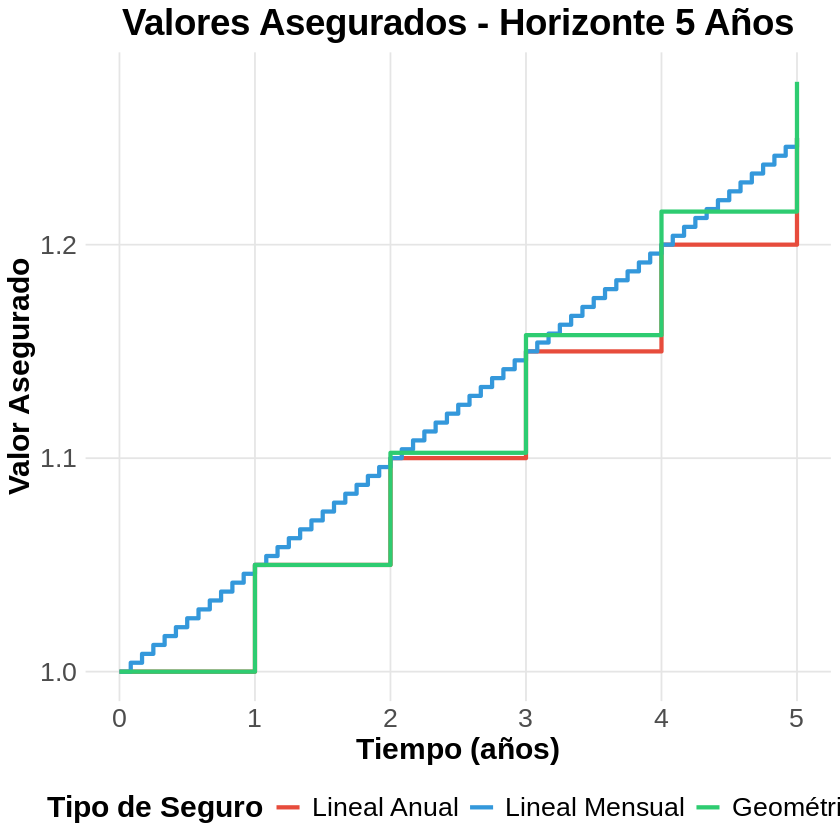


Valores en puntos específicos:
Tiempo	IrAmx		ImrAmx		GrAmx
------	-----		------		-----
0 años	1.0000		1.0000		1.0000
1 años	1.0500		1.0500		1.0500
5 años	1.2500		1.2500		1.2763
10 años	1.5000		1.5000		1.6289
20 años	2.0000		2.0000		2.6533
50 años	3.5000		3.5000		11.4674
70 años	4.5000		4.5000		30.4264


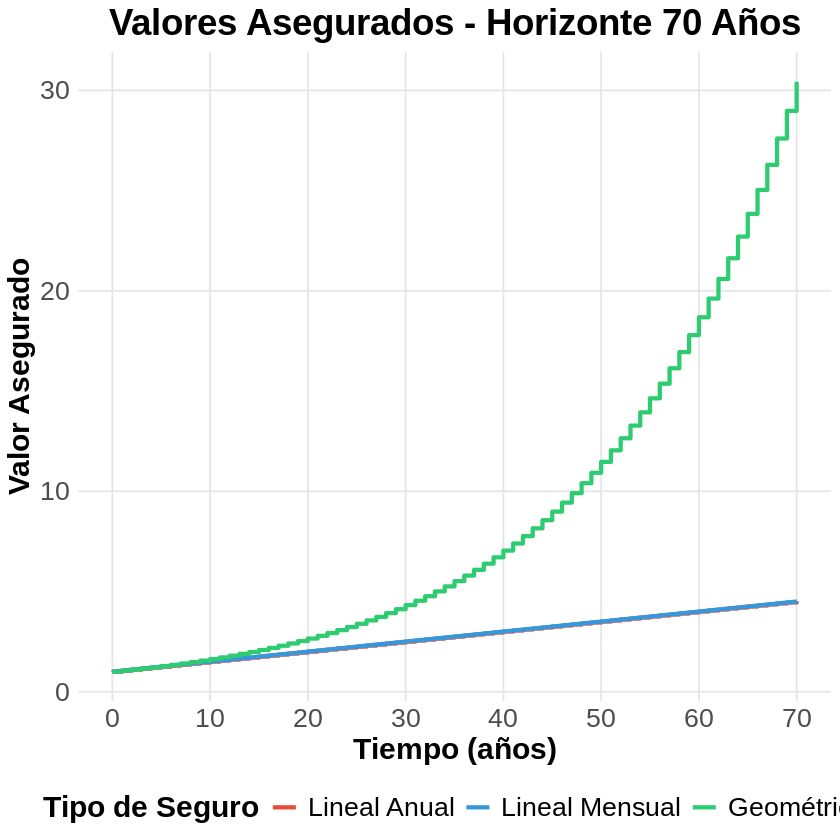

In [10]:
      # Parámetros
       x <- 20
       i <- 0.1
       r <- 0.05
       m <- 12

       library(ggplot2)

       # Función para calcular valores asegurados por mes
       calcular_valores <- function(meses_totales) {
         meses <- 0:(meses_totales - 1)

         # IrAmx: valor constante saltando cada 12 meses: 1 + r * floor(k/m)
         valor_IrAmx <- 1 + r * floor(meses / m)

         # ImrAmx: valor asegurado para cada mes: 1 + r * (k / m)
         valor_ImrAmx <- 1 + r * (meses / m)

         # GrAmx: valor asegurado para cada mes: (1+r)^(floor(k/m))
         valor_GrAmx <- (1 + r)^floor(meses / m)

         data.frame(
           Mes = meses,
           Año = meses / 12,
           IrAmx = valor_IrAmx,
           ImrAmx = valor_ImrAmx,
           GrAmx = valor_GrAmx
         )
       }

       # GRÁFICA 1: 5 años (60 meses)
       datos_5años <- calcular_valores(61)  # 61 para incluir el punto final
       datos_5años_largo <- reshape2::melt(datos_5años[, c("Año", "IrAmx", "ImrAmx", "GrAmx")],
                                          id.vars = "Año",
                                          variable.name = "Tipo",
                                          value.name = "Valor")

       grafica_5años <- ggplot(datos_5años_largo, aes(x = Año, y = Valor, color = Tipo)) +
         geom_step(size = 1.2, direction = "hv") +  # geom_step para mostrar saltos discretos
         scale_color_manual(values = c("IrAmx" = "#e74c3c", "ImrAmx" = "#3498db", "GrAmx" = "#2ecc71"),
                            labels = c("IrAmx" = "Lineal Anual", "ImrAmx" = "Lineal Mensual", "GrAmx" = "Geométrico")) +
         labs(title = "Valores Asegurados - Horizonte 5 Años",
              x = "Tiempo (años)", y = "Valor Asegurado", color = "Tipo de Seguro") +
         theme_minimal() +
         theme(plot.title = element_text(hjust = 0.5, size = 22, face = "bold"),
               legend.position = "bottom",
               legend.text = element_text(size = 16),
               legend.title = element_text(size = 18, face = "bold"),
               axis.title.x = element_text(size = 18, face = "bold"),
               axis.title.y = element_text(size = 18, face = "bold"),
               axis.text.x = element_text(size = 16),
               axis.text.y = element_text(size = 16),
               panel.grid.minor = element_blank(),
               panel.grid.major.x = element_line(color = "gray90", size = 0.5),
               panel.grid.major.y = element_line(color = "gray90", size = 0.5)) +
         scale_x_continuous(breaks = 0:5) +
         guides(color = guide_legend(override.aes = list(size = 3)))

       print(grafica_5años)

       cat("\n", paste(rep("=", 60), collapse=""), "\n\n")

       # GRÁFICA 2: 70 años (840 meses)
       datos_70años <- calcular_valores(841)  # 841 para incluir el punto final
       datos_70años_largo <- reshape2::melt(datos_70años[, c("Año", "IrAmx", "ImrAmx", "GrAmx")],
                                           id.vars = "Año",
                                           variable.name = "Tipo",
                                           value.name = "Valor")

       grafica_70años <- ggplot(datos_70años_largo, aes(x = Año, y = Valor, color = Tipo)) +
         geom_step(size = 1.2, direction = "hv") +  # geom_step para mostrar saltos discretos
         scale_color_manual(values = c("IrAmx" = "#e74c3c", "ImrAmx" = "#3498db", "GrAmx" = "#2ecc71"),
                            labels = c("IrAmx" = "Lineal Anual", "ImrAmx" = "Lineal Mensual", "GrAmx" = "Geométrico")) +
         labs(title = "Valores Asegurados - Horizonte 70 Años",
              x = "Tiempo (años)", y = "Valor Asegurado", color = "Tipo de Seguro") +
         theme_minimal() +
         theme(plot.title = element_text(hjust = 0.5, size = 22, face = "bold"),
               legend.position = "bottom",
               legend.text = element_text(size = 16),
               legend.title = element_text(size = 18, face = "bold"),
               axis.title.x = element_text(size = 18, face = "bold"),
               axis.title.y = element_text(size = 18, face = "bold"),
               axis.text.x = element_text(size = 16),
               axis.text.y = element_text(size = 16),
               panel.grid.minor = element_blank(),
               panel.grid.major.x = element_line(color = "gray90", size = 0.5),
               panel.grid.major.y = element_line(color = "gray90", size = 0.5)) +
         scale_x_continuous(breaks = seq(0, 70, 10)) +
         guides(color = guide_legend(override.aes = list(size = 3)))

       print(grafica_70años)

       # Tabla comparativa para algunos puntos específicos
       cat("\nValores en puntos específicos:\n")
       cat("Tiempo\tIrAmx\t\tImrAmx\t\tGrAmx\n")
       cat("------\t-----\t\t------\t\t-----\n")

       puntos <- c(0, 1, 5, 10, 20, 50, 70)
       for(año in puntos) {
         if(año <= 70) {
           mes <- año * 12
           ir_val <- 1 + r * floor(mes / m)
           imr_val <- 1 + r * (mes / m)
           gr_val <- (1 + r)^floor(mes / m)
           cat(sprintf("%d años\t%.4f\t\t%.4f\t\t%.4f\n", año, ir_val, imr_val, gr_val))
         }
       }